In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque, defaultdict
import pandas as pd
import time

In [18]:
# Funzione per creare il grafo da file, limitata a max_lines righe dal file .arcs
def create_graph_from_files(ids_file_path, arcs_file_path, max_lines):
    """
    Crea il grafo diretto G utilizzando solo le prime max_lines righe del file .arcs.
    Ritorna G (grafo diretto) e U_G (versione non diretta di G).
    """
    G = nx.DiGraph()  # Crea il grafo diretto vuoto

    # Dizionari per mappare ID dei nodi ai nomi delle pagine e viceversa
    id_to_name = {}  
    name_to_id = {}

    # Lettura del file .ids per popolare i dizionari id_to_name e name_to_id
    with open(ids_file_path, 'r', encoding='utf-8') as ids_file:
        for i, line in enumerate(ids_file):
            name = line.strip()  # Rimuove eventuali spazi bianchi
            id_to_name[i] = name  # Mappa l'ID al nome della pagina
            name_to_id[name] = i  # Mappa il nome al rispettivo ID

    # Lettura del file .arcs per aggiungere gli archi al grafo G, limitato a max_lines righe
    with open(arcs_file_path, 'r') as arcs_file:
        for i, line in enumerate(arcs_file):
            if i >= max_lines:
                break  # Ferma il ciclo se raggiungiamo max_lines righe
            u, v = map(int, line.strip().split())  # Divide la riga in due ID (u, v)
            G.add_edge(u, v)  # Aggiunge un arco diretto tra u e v

    # Crea la versione non diretta del grafo G (U(G)) per future analisi
    U_G = G.to_undirected()

    return G, U_G, id_to_name, name_to_id

# Impostazioni dei percorsi e numero massimo di righe da leggere
ids_file_path = 'itwiki-2013.ids'
arcs_file_path = 'itwiki-2013.arcs'
max_lines = 11000000  # Imposta il numero massimo di righe da leggere per il grafo
# RIGHE TOTALI NEL FILE 25619929

# Crea il grafo utilizzando solo le prime max_lines righe
G, U_G, id_to_name, name_to_id = create_graph_from_files(ids_file_path, arcs_file_path, max_lines)  # Per test

In [19]:
print(f"Numero di nodi nel grafo: {G.number_of_nodes()}\nNumero di archi nel grafo: {G.number_of_edges()}")

Numero di nodi nel grafo: 768144
Numero di archi nel grafo: 11000000


## DOMANDA 1/II - Calcola la distribuzione degli outdegree in G: quali sono le prime 10 pagine con il maggior outdegree?

In [20]:
out_degree_dict = {}  # Dizionario per memorizzare l'outdegree per ciascun nodo

# Calcola l'outdegree per ogni nodo iterando sugli archi del grafo
for u, v in G.edges():
    if u in out_degree_dict:
        out_degree_dict[u] += 1  # Se il nodo esiste, incrementa l'outdegree
    else:
        out_degree_dict[u] = 1  # Altrimenti, imposta l'outdegree a 1

# Assicurati che ogni nodo sia presente nel dizionario, anche quelli senza archi in uscita
for node in G.nodes():
    if node not in out_degree_dict:
        out_degree_dict[node] = 0  # I nodi senza collegamenti in uscita hanno outdegree 0

# Ordina i nodi in base al loro outdegree in ordine decrescente e seleziona i primi 10
top_10_outdegree = sorted(out_degree_dict.items(), key=lambda x: x[1], reverse=True)[:10]

# Stampa i primi 10 nodi con il maggior outdegree, insieme ai loro nomi e ID
print("Prime 10 pagine con il maggior outdegree:")
for index, (node_id, out_degree) in enumerate(top_10_outdegree, start=1):
    page_name = id_to_name.get(node_id, "Nome non disponibile")
    print(f"{index}) {page_name}, ID: {node_id}, Outdegree: {out_degree}")

Prime 10 pagine con il maggior outdegree:
1) Città dell'India, ID: 261576, Outdegree: 5212
2) Nati nel 1981, ID: 395575, Outdegree: 3256
3) Nati nel 1985, ID: 395611, Outdegree: 3250
4) Nati nel 1983, ID: 395769, Outdegree: 3235
5) Nati nel 1984, ID: 395650, Outdegree: 3231
6) Nati nel 1986, ID: 395880, Outdegree: 3168
7) Nati nel 1982, ID: 395848, Outdegree: 3156
8) Nati nel 1980, ID: 395546, Outdegree: 3120
9) Nati nel 1979, ID: 395354, Outdegree: 3007
10) Nati nel 1987, ID: 395324, Outdegree: 3004


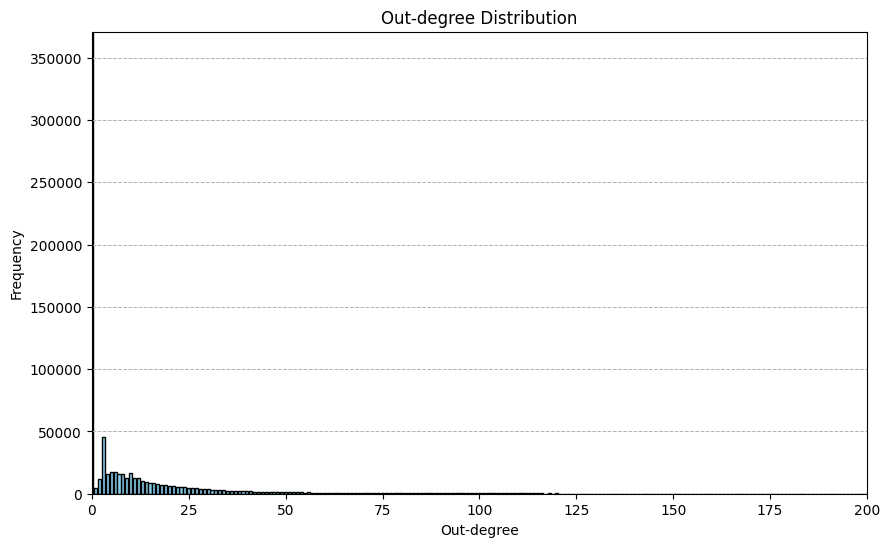

In [42]:
def plot_out_degree_distribution(out_degree_dict):
    """
    Visualizza la distribuzione degli outdegree dei nodi in G.
    """
    out_degree_count = {}
    for degree in out_degree_dict.values():
        out_degree_count[degree] = out_degree_count.get(degree, 0) + 1  # Conta quanti nodi hanno un certo outdegree

    degrees = list(out_degree_count.keys())  # Outdegree unici
    frequencies = [out_degree_count[degree] for degree in degrees]  # Frequenza per ogni outdegree

    # Grafico a barre della distribuzione degli outdegree
    plt.figure(figsize=(10, 6))
    plt.bar(degrees, frequencies, color='skyblue', edgecolor='black')
    plt.xlabel('Out-degree')
    plt.ylabel('Frequency')
    plt.title('Out-degree Distribution')
    plt.xlim([0, 200])  # Limita l'asse x
    plt.ylim([0, max(frequencies)])  # Limita l'asse y
    plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)
    plt.show()

# Visualizza la distribuzione degli outdegree
plot_out_degree_distribution(out_degree_dict)

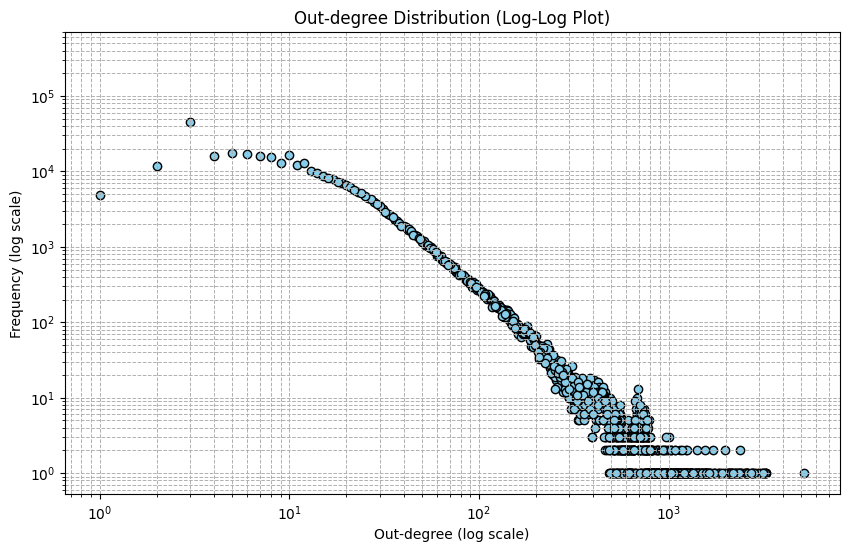

In [45]:
def plot_log_log_out_degree_distribution(out_degree_dict):
    """
    Visualizza un grafico log-log della distribuzione degli outdegree.
    """
    out_degree_count = {}
    for degree in out_degree_dict.values():
        out_degree_count[degree] = out_degree_count.get(degree, 0) + 1

    degrees = list(out_degree_count.keys())
    frequencies = [out_degree_count[degree] for degree in degrees]

    # Grafico log-log
    plt.figure(figsize=(10, 6))
    plt.scatter(degrees, frequencies, color='skyblue', edgecolor='black')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Out-degree (log scale)')
    plt.ylabel('Frequency (log scale)')
    plt.title('Out-degree Distribution (Log-Log Plot)')
    plt.grid(True, which='both', linestyle='--', linewidth=0.7)
    plt.show()

# Visualizza la distribuzione log-log
plot_log_log_out_degree_distribution(out_degree_dict)

## DOMANDA 2/A - Considerando U(G) e limitandosi alla sua componente connessa più grande V', calcola esattamente il diametro del grafo indotto dai vertici in V'. Ripeti la domanda rimuovendo dai grafi i nodi il cui nome contiene la stringa "disambigua".

In [23]:
def find_largest_connected_component(graph):
    """
    Trova la componente connessa più grande in un grafo non diretto usando BFS.
    Restituisce il sottografo della LCC.
    """
    def bfs_component(start_node):
        visited = set()
        queue = deque([start_node])
        component = set()

        while queue:
            node = queue.popleft()
            component.add(node)
            for neighbor in graph.neighbors(node):
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append(neighbor)

        return component

    visited = set()
    largest_component = set()

    for node in graph.nodes():
        if node not in visited:
            component = bfs_component(node)
            visited.update(component)
            if len(component) > len(largest_component):
                largest_component = component

    return graph.subgraph(largest_component).copy()

# BFS per calcolare l'eccentricità di un nodo
def bfs_eccentricity(graph, start_node):
    """
    Calcola l'eccentricità di un nodo usando BFS.
    Restituisce l'eccentricità e il nodo più distante.
    """
    visited = {start_node: 0}
    queue = deque([start_node])
    max_distance = 0
    farthest_node = start_node

    while queue:
        node = queue.popleft()
        current_distance = visited[node]

        if current_distance > max_distance:
            max_distance = current_distance
            farthest_node = node

        for neighbor in graph.neighbors(node):
            if neighbor not in visited:
                visited[neighbor] = current_distance + 1
                queue.append(neighbor)

    return max_distance, farthest_node

# BFS bidirezionale semplificata per trovare la distanza tra due nodi
def bidirectional_bfs(graph, start_node, target_node):
    """
    Implementa una BFS bidirezionale tra start_node e target_node.
    Restituisce la distanza minima tra i due nodi o -1 se non sono connessi.
    """
    if start_node == target_node:
        return 0  # Se i nodi coincidono, la distanza è 0

    # Inizializza le code e i set per i nodi visitati da entrambi i lati
    start_visited = {start_node: 0}
    target_visited = {target_node: 0}
    
    start_queue = deque([start_node])
    target_queue = deque([target_node])
    
    # Continua a espandere le esplorazioni finché entrambe le code non sono vuote
    while start_queue and target_queue:
        # Espansione dalla parte del nodo di partenza
        node = start_queue.popleft()
        current_distance = start_visited[node]

        for neighbor in graph.neighbors(node):
            if neighbor in target_visited:
                # Ritorna la somma delle distanze se l'espansione si incrocia
                return current_distance + target_visited[neighbor] + 1
            if neighbor not in start_visited:
                start_visited[neighbor] = current_distance + 1
                start_queue.append(neighbor)

        # Espansione dalla parte del nodo di arrivo
        node = target_queue.popleft()
        current_distance = target_visited[node]

        for neighbor in graph.neighbors(node):
            if neighbor in start_visited:
                # Ritorna la somma delle distanze se l'espansione si incrocia
                return current_distance + start_visited[neighbor] + 1
            if neighbor not in target_visited:
                target_visited[neighbor] = current_distance + 1
                target_queue.append(neighbor)

    return -1  # Se non esiste un percorso tra i due nodi, restituisci -1

# Funzione per trovare i nodi a distanza 'depth'
def bfs_fringe(graph, start_node, depth):
    """
    Trova i nodi a distanza 'depth' dal nodo di partenza usando BFS.
    """
    visited = {start_node: 0}
    queue = deque([(start_node, 0)])  # (nodo, distanza)
    fringe = set()

    while queue:
        node, dist = queue.popleft()

        if dist == depth:
            fringe.add(node)
        elif dist > depth:
            break

        for neighbor in graph.neighbors(node):
            if neighbor not in visited:
                visited[neighbor] = dist + 1
                queue.append((neighbor, dist + 1))

    return fringe

# Algoritmo iFub ottimizzato per calcolare il diametro
def ifub_diameter(graph):
    """
    Calcola il diametro del grafo usando l'algoritmo iFub ottimizzato con BFS bidirezionale.
    """
    # Step 1: Inizia con un nodo qualsiasi
    start_node = list(graph.nodes())[0]

    # Step 2: Calcola l'eccentricità iniziale con BFS e trova il nodo più lontano
    _, farthest_node = bfs_eccentricity(graph, start_node)

    # Step 3: Imposta i limiti iniziali
    lb, farthest_node = bfs_eccentricity(graph, farthest_node)
    ub = 2 * lb  # Upper bound è il doppio del limite inferiore
    i = lb

    while ub > lb:
        # Step 4: Trova la fringe a distanza 'i' dal nodo più lontano
        fringe_nodes = bfs_fringe(graph, farthest_node, i)

        # Step 5: Trova l'eccentricità massima tra i nodi nella fringe con BFS bidirezionale
        max_eccentricity_in_fringe = 0
        for node in fringe_nodes:
            eccentricity = bidirectional_bfs(graph, farthest_node, node)
            max_eccentricity_in_fringe = max(max_eccentricity_in_fringe, eccentricity)

        # Aggiorna i limiti
        lb = max(lb, max_eccentricity_in_fringe)
        ub = 2 * (i - 1)
        i -= 1

    return lb  # Il diametro si trova quando i limiti convergono

# Rimuovi i nodi 'disambigua'
def remove_disambigua_nodes(graph, id_to_name):
    """
    Rimuove i nodi che contengono 'disambigua' nel nome e ritorna il grafo ridotto.
    """
    nodes_to_remove = [node for node in graph.nodes() if "disambigua" in id_to_name.get(node, "").lower()]
    graph.remove_nodes_from(nodes_to_remove)
    return graph

# Funzione pipeline per calcolare il diametro
def pipeline(graph, id_to_name):
    """
    Calcola il diametro del grafo con e senza nodi 'disambigua'.
    """
    # Calcolo con i nodi 'disambigua'
    start_time = time.time()
    print("Calcolo con nodi 'disambigua'...")
    largest_cc = find_largest_connected_component(graph)
    diameter = ifub_diameter(largest_cc)
    print(f"Diametro iFub: {diameter}")
    end_time = time.time() 
    print(f"Tempo di esecuzione: {end_time - start_time:.2f} secondi\n")
    
    # Calcolo senza nodi 'disambigua'
    start_time = time.time()
    print("Rimozione dei nodi 'disambigua' e ricalcolo...")
    graph_cleaned = remove_disambigua_nodes(graph.copy(), id_to_name)
    largest_cc = find_largest_connected_component(graph_cleaned)
    diameter = ifub_diameter(largest_cc)
    print(f'Diametro iFub): {diameter}')
    end_time = time.time() 
    print(f"Tempo di esecuzione: {end_time - start_time:.2f} secondi\n")

In [24]:
pipeline(U_G, id_to_name)

Calcolo con nodi 'disambigua'...
Diametro iFub: 12
Tempo di esecuzione: 510.01 secondi

Rimozione dei nodi 'disambigua' e ricalcolo...
Diametro iFub): 12
Tempo di esecuzione: 774.50 secondi



## DOMANDA 3/1 - Considerando U(G), costruisci un algoritmo per trovare una Clique Massimale. Riesci a trovare due di essi anziché solo uno?


In [25]:
def bron_kerbosch(R, P, X, graph, maximal_cliques, max_cliques_needed=2):
    """
    Algoritmo Bron-Kerbosch modificato per trovare cliques massimali.
    R: Insieme dei nodi che sono già nella clique corrente.
    P: Insieme dei nodi che possono essere aggiunti alla clique.
    X: Insieme dei nodi che non possono più essere aggiunti.
    maximal_cliques: Lista dove vengono aggiunte le cliques massimali trovate.
    max_cliques_needed: Numero massimo di cliques da trovare (almeno 2).
    """
    if not P and not X:
        if len(R) >= 3:  # Consideriamo solo cliques con almeno 3 nodi
            maximal_cliques.append(R)  # Aggiungi la clique trovata alla lista
        return

    if len(maximal_cliques) >= max_cliques_needed:
        return

    # Scegli un pivot u da P ∪ X (preferibilmente da P)
    pivot = next(iter(P.union(X)), None)
    if pivot is None:
        return

    # Processa i nodi di P che non sono vicini del pivot
    for node in P - set(graph.neighbors(pivot)):
        bron_kerbosch(R.union([node]), P.intersection(graph.neighbors(node)), X.intersection(graph.neighbors(node)), graph, maximal_cliques, max_cliques_needed)
        P.remove(node)
        X.add(node)

def find_maximal_cliques_bron_kerbosch(graph, id_to_name, max_cliques_needed=2):
    """
    Funzione che avvia l'algoritmo Bron-Kerbosch e trova più cliques massimali non banali.
    Ritorna una lista con le cliques trovate e le stampa con i nomi dei nodi.
    """
    R = set()
    P = set(graph.nodes())
    X = set()
    
    maximal_cliques = []  # Lista per memorizzare le cliques massimali trovate
    bron_kerbosch(R, P, X, graph, maximal_cliques, max_cliques_needed)

    # Stampa le cliques massimali con i nomi dei nodi
    for idx, clique in enumerate(maximal_cliques, start=1):
        clique_names = [id_to_name[node] for node in clique]  # Converte gli ID nei nomi
        print(f"Clique massimale {idx}: {clique_names}")

    return maximal_cliques

# Esegui l'algoritmo per trovare due cliques massimali con i nomi dei nodi
maximal_cliques = find_maximal_cliques_bron_kerbosch(U_G, id_to_name, max_cliques_needed=2)


Clique massimale 1: ['Cabra de Mora', 'Spagna', 'Aragona', 'Formiche Alto', 'Comunità autonome della Spagna', 'El Castellar']
Clique massimale 2: ['Cabra de Mora', 'El Castellar', 'Alcalá de la Selva']
